
<h1 align=center><font size=5>Operacion De Datos.</font></h1>

<h2> Tabla de contenido </h2>


<ul>
    <li> <a href="#Generar_Manejar_Valores_Perdidos"> Identifica y maneja los valores faltantes </a>
        <ul>
            <li> <a href="#identificar_datos_perdidos"> Identifique valores perdidos </a> </li>
            <li> <a href="#tratar_datos_faltantes"> Tratar datos faltantes </a> </li>
            <li> <a href="#formato_correcto_datos"> Formato de datos correcto </a> </li>
        </ul>
    </li>
    <li> <a href="#data_estandardization"> Estandarización de datos </a> </li>
    <li> <a href="#normalizacion_datos"> Normalización de datos (centrado / escalado) </a> </li>
    <li> <a href="#binning"> Binning </a> </li>
    <li> <a href="#dummy"> Variable dummy </a> </li>
</ul>

 


<h2> ¿Cuál es el propósito de la Operacion de datos? </h2>

Data Wrangling es el proceso de convertir datos del formato inicial a un formato que puede ser mejor para el análisis.

<h3> ¿Cuál es la tasa de consumo de combustible (L / 100k) para el automóvil diesel? </h3>
<h3>Importamos los datos </h3>

In [157]:
#Librerias a utilizar.
import pandas as pd
import matplotlib.pylab as plt

In [158]:
archivo = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [159]:
#Creamos una lista con los encbezados.
Encabezados = ["simbolización", "pérdidas normalizadas", "marca", "tipo de combustible", "aspiración", "número de puertas", "estilo de carrocería",
         "ruedas motrices", "ubicación del motor", "distancia entre ejes", "longitud", "ancho", "altura", "peso en vacío", "tipo de motor",
         "número de cilindros", "tamaño del motor", "sistema de combustible", "diámetro interior", "carrera", "relación de compresión", "potencia",
         "pico-rpm", "ciudad-mpg", "carretera-mpg", "precio"]

In [160]:
#Ahora si cargamos los datos.
datos = pd.read_csv(archivo, names = Encabezados)

In [161]:
#Comprobamos que la carga de datos sea la correcta
datos.head()

,simbolización,pérdidas normalizadas,marca,tipo de combustible,aspiración,número de puertas,estilo de carrocería,ruedas motrices,ubicación del motor,distancia entre ejes,...,tamaño del motor,sistema de combustible,diámetro interior,carrera,relación de compresión,potencia,pico-rpm,ciudad-mpg,carretera-mpg,precio
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Como podemos ver, varios signos de interrogación aparecieron en el marco de datos; esos son valores faltantes que pueden dificultar nuestro análisis posterior.
<div> Entonces, ¿cómo identificamos todos esos valores faltantes y los tratamos? </div>


<b> ¿Cómo trabajar con datos faltantes? </b>

Pasos para trabajar con datos faltantes:
<ol>
    <li> dentificar datos faltantes </li>
    <li> tratar con datos faltantes </li>
    <li> formato de datos correcto </li>
</ol>

<h2 id = "Generar_Manejar_Valores_Perdidos"> Identificar y manejar valores perdidos </h2>


<h3 id = "identificar_datos_perdidos"> Identificar valores perdidos </h3>
<h4> Convertir "?" a NaN </h4>
En el conjunto de datos del automóvil, los datos faltantes vienen con el signo de interrogación "?".
Reemplazamos "?" con NaN (No es un número), que es el marcador de valor perdido predeterminado de Python, por razones de velocidad y conveniencia computacionales. Aquí usamos la función:
 <pre> .replace (A, B, inplace = True) </pre>
para reemplazar A por B

In [11]:
import numpy as np

# remplazamos "?" a NaN
datos.replace("?", np.nan, inplace = True)
datos.head(5)

,simbolización,pérdidas normalizadas,marca,tipo de combustible,aspiración,número de puertas,estilo de carrocería,ruedas motrices,ubicación del motor,distancia entre ejes,...,tamaño del motor,sistema de combustible,diámetro interior,carrera,relación de compresión,potencia,pico-rpm,ciudad-mpg,carretera-mpg,precio
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


definir_valores_faltantes

<h4> Evaluación de datos faltantes </h4>

Los valores faltantes se convierten al valor predeterminado de Python. Utilizamos las funciones integradas de Python para identificar estos valores faltantes. Hay dos métodos para detectar datos faltantes:
<ol>
    <li><b>.isnull()</b> </li>
    <li><b>.notnull()</b> </li>
</ol>
La salida es un valor booleano que indica si el valor que se pasa al argumento es de hecho datos faltantes.


"**True**" significa valor **perdido**, mientras que "**False**" significa valor **no** perdido.

In [13]:
datos_faltantes = datos.isnull()
datos_faltantes.head(5)

,simbolización,pérdidas normalizadas,marca,tipo de combustible,aspiración,número de puertas,estilo de carrocería,ruedas motrices,ubicación del motor,distancia entre ejes,...,tamaño del motor,sistema de combustible,diámetro interior,carrera,relación de compresión,potencia,pico-rpm,ciudad-mpg,carretera-mpg,precio
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h4> Contamos los valores faltantes por columna </h4>
<p>
Usando un bucle for en Python, podemos calcular rápidamente el número de valores faltantes en cada columna. Como se mencionó anteriormente, "Verdadero" representa un valor faltante, "Falso" significa que el valor está presente en el conjunto de datos. En el cuerpo del bucle for, el método ".value_counts ()" cuenta el número de valores "Verdaderos".
</p>

In [15]:
for columna in datos_faltantes.columns.values.tolist():
    print(columna)
    print (datos_faltantes[columna].value_counts())
    print("")   

simbolización
False    205
Name: simbolización, dtype: int64

pérdidas normalizadas
False    164
True      41
Name: pérdidas normalizadas, dtype: int64

marca
False    205
Name: marca, dtype: int64

tipo de combustible
False    205
Name: tipo de combustible, dtype: int64

aspiración
False    205
Name: aspiración, dtype: int64

número de puertas
False    203
True       2
Name: número de puertas, dtype: int64

estilo de carrocería
False    205
Name: estilo de carrocería, dtype: int64

ruedas motrices
False    205
Name: ruedas motrices, dtype: int64

ubicación del motor
False    205
Name: ubicación del motor, dtype: int64

distancia entre ejes
False    205
Name: distancia entre ejes, dtype: int64

longitud
False    205
Name: longitud, dtype: int64

ancho
False    205
Name: ancho, dtype: int64

altura
False    205
Name: altura, dtype: int64

peso en vacío
False    205
Name: peso en vacío, dtype: int64

tipo de motor
False    205
Name: tipo de motor, dtype: int64

número de cilindros
False 

Según el resumen anterior, cada columna tiene 205 filas de datos, siete columnas que contienen datos faltantes:
<ol>
    <li> "pérdidas normalizadas": 41 datos faltantes </li>
    <li> "número de puertas": 2 datos faltantes </li>
    <li> "bore": 4 datos faltantes </li>
    <li> "trazo": 4 datos faltantes </li>
    <li> "caballos de fuerza": 2 datos faltantes </li>
    <li> "pico-rpm": faltan 2 datos </li>
    <li> "precio": 4 datos faltantes </li>
</ol>

<h2 id = "tratar_datos_faltantes"> Tratar datos Faltantes </h2>

Las columnas enteras solo deben descartarse si la **mayoría de las entradas de la columna están vacías**. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para soltarla por completo.

Tenemos **cierta libertad para elegir qué método reemplazar datos**; sin embargo, algunos métodos pueden parecer más razonables que otros. Aplicaremos cada método a muchas columnas diferentes:

<b> Reemplazar por medio: </b>
<ul>
    <li> "pérdidas normalizadas": 41 datos faltantes, reemplácelos con la media </li>
    <li> "trazo": 4 datos faltantes, reemplácelos con media </li>
    <li> "bore": 4 datos faltantes, reemplácelos con media </li>
    <li> "caballos de fuerza": 2 datos faltantes, reemplácelos con media </li>
    <li> "pico-rpm": faltan 2 datos, reemplácelos con la media </li>
</ul>

<b> Reemplazar por frecuencia: </b>
<ul>
    <li> "número de puertas": faltan 2 datos, reemplácelos con "cuatro".
        <ul>
            <li> Motivo: 84% sedanes son cuatro puertas. Dado que las cuatro puertas son más frecuentes, es más probable que ocurran </li>
        </ul>
    </li>
</ul>

<b> Eliminar toda la fila: </b>
<ul>
    <li> "precio": 4 datos faltantes, simplemente eliminemos toda la fila
        <ul>
            <li> Motivo: el precio es lo que queremos predecir. Cualquier entrada de datos sin datos de precios no se puede utilizar para la predicción; por lo tanto, cualquier fila ahora sin datos de precios no nos es útil </li>
        </ul>
    </li>
</ul>

<h4> Calculamos el promedio de la columna </h4>

In [17]:
perdidas_Norm = datos["pérdidas normalizadas"].astype("float").mean(axis=0)
print("Promedio de pérdidas normalizadas:", perdidas_Norm)

Promedio de pérdidas normalizadas: 122.0


<h4> Remplazamos "NaN" por el valor medio en la columna "pérdidas normalizadas" </h4>

In [69]:
datos["pérdidas normalizadas"].replace(np.nan, perdidas_Norm , inplace=True)


<h4> Calculamos el valor medio para la columna 'diámetro' </h4>

In [24]:
mudiam =datos['diámetro interior'].astype('float').mean(axis=0)
print("Promedio del diametros:", mudiam)

Promedio del diametros: 3.3297512437810943


<h4>Remplazamos NaN con el valor medio</h4>

In [29]:
datos['diámetro interior'].replace(np.nan, mudiam, inplace=True)

<h4>Remplazamos NaN por el valor medio de la columna carrera</h4>

In [36]:
#Calculo de la media.
mcarrera = datos['carrera'].astype('float').mean(axis=0)
print("Promedio de carrera:",mcarrera)
#Añadimos nuestra informacion
datos['carrera'].replace(np.nan,mcarrera,inplace=True)

Promedio de carrera: 3.255422885572139


<h4>Calculamos la media de la columna potencia</h4>

In [38]:
#calculo de media
mcabalo = datos['potencia'].astype('float').mean(axis=0)
#Asignamos la media a los valores faltantes
datos['potencia'].replace(np.nan,mcabalo,inplace=True)

<h4>Calculamos el valor medio para la columna 'pico-rpm'<h4>

In [45]:
mpico = datos['pico-rpm'].astype('float').mean(axis=0)
datos['pico-rpm'].replace(np.nan,mpico,inplace=True)

Para ver qué valores están presentes en una columna en particular, podemos usar el método ".value_counts ()":

In [48]:
datos['número de puertas'].value_counts()

four    114
two      89
Name: número de puertas, dtype: int64

Podemos ver que cuatro puertas son el tipo más común. También podemos usar el método ".idxmax ()" para calcular automáticamente el tipo más común:

In [49]:
datos['número de puertas'].value_counts().idxmax()

'four'

El procedimiento de reemplazo es muy similar al que hemos visto anteriormente.

In [50]:
#remplazamos los valores nan con la frecuencia relativa
datos['número de puertas'].replace(np.nan, "four", inplace=True)

Finalmente, eliminemos todas las filas que no tienen datos de precios

In [51]:
# Eliminamos la fila de valores Nan de precio
datos.dropna(subset=["precio"], axis=0, inplace=True)

# restablecemos el índice, porque eliminamos dos filas
datos.reset_index(drop=True, inplace=True)

In [52]:
datos.head()

,simbolización,pérdidas normalizadas,marca,tipo de combustible,aspiración,número de puertas,estilo de carrocería,ruedas motrices,ubicación del motor,distancia entre ejes,...,tamaño del motor,sistema de combustible,diámetro interior,carrera,relación de compresión,potencia,pico-rpm,ciudad-mpg,carretera-mpg,precio
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**ASI QUEDA NUESTRO CONJUNTO DE DATOS SIN VALORES NULOS**

<h3 id="formato_correcto_datos"> Formato de datos correcto </h3>

<p> El último paso en la limpieza de datos es verificar y asegurarse de que todos los datos estén en el formato correcto (int, float, text u otro). </p>

En pandas, usamos
<p> <b> .dtype () </b> para verificar el tipo de datos </p>
<p> <b> .astype () </b> para cambiar el tipo de datos </p>

<h4> enumeramos los tipos de datos para cada columna </h4>

In [56]:
datos.dtypes

simbolización               int64
pérdidas normalizadas      object
marca                      object
tipo de combustible        object
aspiración                 object
número de puertas          object
estilo de carrocería       object
ruedas motrices            object
ubicación del motor        object
distancia entre ejes      float64
longitud                  float64
ancho                     float64
altura                    float64
peso en vacío               int64
tipo de motor              object
número de cilindros        object
tamaño del motor            int64
sistema de combustible     object
diámetro interior          object
carrera                    object
relación de compresión    float64
potencia                   object
pico-rpm                   object
ciudad-mpg                  int64
carretera-mpg               int64
precio                     object
dtype: object

<p> Como podemos ver arriba, algunas columnas no son del tipo de datos correcto. Las variables numéricas deben tener el tipo 'float' o 'int', y las variables con cadenas como las categorías deben tener el tipo 'object'. Por ejemplo, las variables 'diámetro' y 'carrera' son valores numéricos que describen los motores, por lo que deberíamos esperar que sean del tipo 'flotante' o 'int'; sin embargo, se muestran como tipo 'objeto'. Tenemos que convertir los tipos de datos en un formato adecuado para cada columna utilizando el método "astype ()". </p>

In [73]:
datos [["diámetro interior", "carrera"]] = datos [["diámetro interior", "carrera"]]. astype ("float")
datos [["pérdidas-normalizadas"]] = datos[["pérdidas normalizadas"]]. astype ("float")
datos [["precio"]] = datos [["precio"]]. astype ("float")
datos [["pico-rpm"]] = datos [["pico-rpm"]]. astype ("float")
datos [['potencia']] = datos [['potencia']].astype('int')

<h4> Hagamos una lista de las columnas después de la conversión </h4>

In [137]:
datos.dtypes

simbolización                int64
pérdidas normalizadas       object
marca                       object
aspiración                  object
número de puertas           object
estilo de carrocería        object
ruedas motrices             object
ubicación del motor         object
distancia entre ejes       float64
longitud                   float64
ancho                      float64
altura                     float64
peso en vacío                int64
tipo de motor               object
número de cilindros         object
tamaño del motor             int64
diámetro interior          float64
carrera                    float64
relación de compresión     float64
potencia                     int64
pico-rpm                   float64
ciudad-mpg                   int64
carretera-mpg              float64
precio                     float64
pérdidas-normalizadas      float64
ciudad-L/100km             float64
binn_potencia             category
dtype: object

**Podemos ver que ahora tenemos nuestros datos perfectamente limpios**

<h2 id = "estandarizacion_datos"> Estandarización de datos </h2>
<p>
Los datos generalmente se recopilan de diferentes agencias con diferentes formatos.
(La estandarización de datos también es un término para un tipo particular de normalización de datos, donde restamos la media y la dividimos por la desviación estándar)
</p>
    
<b> ¿Qué es la estandarización? </b>
<p> La estandarización es el proceso de transformación de datos en un formato común que permite al investigador hacer una comparación significativa.
</p>

<b> Ejemplo </b>
<p> Transformar mpg a L / 100km: </p>
<p> En nuestro conjunto de datos, las columnas de consumo de combustible "ciudad-mpg" y "autopista-mpg" están representadas por unidad de mpg (millas por galón). Supongamos que estamos desarrollando una aplicación en un país que acepta el consumo de combustible con el estándar L / 100km </p>
<p> Necesitaremos aplicar <b> transformación de datos </b> para transformar mpg en L / 100km </p>

<p>La formula de conversion es:<p>
L/100km = 235 / mpg
<p>Podemos hacer esto de manera matematica con pandas.</p>

In [138]:
datos.head()

,simbolización,pérdidas normalizadas,marca,aspiración,número de puertas,estilo de carrocería,ruedas motrices,ubicación del motor,distancia entre ejes,longitud,...,carrera,relación de compresión,potencia,pico-rpm,ciudad-mpg,carretera-mpg,precio,pérdidas-normalizadas,ciudad-L/100km,binn_potencia
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,8.703704,13495.0,122.0,11.190476,Bajo
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,8.703704,16500.0,122.0,11.190476,Bajo
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,9.038462,16500.0,122.0,12.368421,medio
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,7.833333,13950.0,164.0,9.791667,Bajo
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,10.681818,17450.0,164.0,13.055556,Bajo


In [139]:
# Convertimops mpg a L/100km con la opreacion amtematica(235 dividido entre mpg)
datos['ciudad-L/100km'] = 235/datos["ciudad-mpg"]

# Checamos la transformacion de datos 
datos.head()

,simbolización,pérdidas normalizadas,marca,aspiración,número de puertas,estilo de carrocería,ruedas motrices,ubicación del motor,distancia entre ejes,longitud,...,carrera,relación de compresión,potencia,pico-rpm,ciudad-mpg,carretera-mpg,precio,pérdidas-normalizadas,ciudad-L/100km,binn_potencia
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,8.703704,13495.0,122.0,11.190476,Bajo
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,8.703704,16500.0,122.0,11.190476,Bajo
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,9.038462,16500.0,122.0,12.368421,medio
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,7.833333,13950.0,164.0,9.791667,Bajo
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,10.681818,17450.0,164.0,13.055556,Bajo


transformamos mpg a L / 100km en la columna de "carretera-mpg" y cambie el nombre de la columna a "carretera-L / 100km".

In [140]:
datos["carretera-mpg"] = 235/datos["carretera-mpg"]
datos.rename(columns={'"carretera-mpg"':'carretera-L/100km'}, inplace=True)
datos.head()


,simbolización,pérdidas normalizadas,marca,aspiración,número de puertas,estilo de carrocería,ruedas motrices,ubicación del motor,distancia entre ejes,longitud,...,carrera,relación de compresión,potencia,pico-rpm,ciudad-mpg,carretera-mpg,precio,pérdidas-normalizadas,ciudad-L/100km,binn_potencia
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27.0,13495.0,122.0,11.190476,Bajo
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27.0,16500.0,122.0,11.190476,Bajo
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,26.0,16500.0,122.0,12.368421,medio
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,30.0,13950.0,164.0,9.791667,Bajo
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,22.0,17450.0,164.0,13.055556,Bajo


<h2 id = "normalizacion_datos"> Normalización de datos </h2>

<b> ¿Por qué normalización? </b>
<p> La normalización es el proceso de transformar valores de varias variables en un rango similar. Las normalizaciones típicas incluyen escalar la variable para que el promedio de la variable sea 0, escalar la variable para que la varianza sea 1 o escalar la variable para que los valores de la variable varíen de 0 a 1
</p>

<b> Ejemplo </b>
<p> Para demostrar la normalización, digamos que queremos escalar las columnas "largo", "ancho" y "alto" </p>
<p> <b> Objetivo: </b> nos gustaría Normalizar esas variables para que su valor oscile entre 0 y 1. </p>
<p> <b> Enfoque: </b> reemplazaremos el valor original por (valor original) / (valor máximo) </p>

In [141]:
# reemplazaremos (valor original) por (valor original) / (valor máximo) & la altura
datos ['longitud'] = datos ['longitud'] / datos ['longitud']. max ()
datos ['ancho'] = datos ['ancho'] / datos ['ancho']. max ()


In [142]:
datos['altura'] = datos['altura'] / datos['altura']. max ()
# muestra las columnas escaladas
datos[["longitud", "ancho", "altura"]]. head ()

,longitud,ancho,altura
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Podemos observar que nuestros datos considerados ya se encuentran noramlizados.

<h2 id = "binning"> Binning </h2>
<b> ¿Por qué binning? </b>
<p>
    Binning es un proceso de transformación de variables numéricas continuas en 'contenedores' categóricos discretos, para análisis agrupados.
</p>

<b> Ejemplo: </b>
<p> En nuestro conjunto de datos, "caballos de fuerza" es una variable con un valor real que oscila entre 48 y 288, tiene 57 valores únicos. ¿Qué sucede si solo nos importa la diferencia de precio entre los automóviles con alta potencia, potencia media y poca potencia (3 tipos)? ¿Podemos reorganizarlos en tres 'contenedores' para simplificar el análisis? </p>

<p> Usaremos el método Pandas 'cut' para segmentar la columna 'caballos de fuerza' en 3 contenedores </p>

<h3>Ejemplo de Binnig en pandas</h3>

In [143]:
#Convertimos nuestros datos a una forma correcta
datos["potencia"]=datos["potencia"].astype(int, copy=True)

Ahora podems hacer un histograma de la potencia para ver la distribucion de los datos.

Text(0.5, 1.0, 'potencia bins')

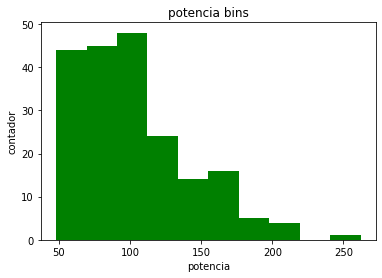

In [144]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(datos["potencia"],color="green")

# set x/y labels and plot title
plt.pyplot.xlabel("potencia")
plt.pyplot.ylabel("contador")
plt.pyplot.title("potencia bins")

<p> Nos gustaría 3 bins de ancho de banda de igual tamaño, por lo que utilizamos la función <code> linspace de numpy (start_value, end_value, numbers_generated </code>. </p>
<p> Como queremos incluir el valor mínimo de caballos de fuerza, queremos establecer valor_inicial = min (df ["potencia"]). </p>
<p> Como queremos incluir el valor máximo de caballos de fuerza, queremos establecer valor_final = max (df ["potencia"]). </p>
<p> Dado que estamos construyendo 3 contenedores de igual longitud, debería haber 4 divisores, por lo que numeros_generados = 4. </p>

Construimos un array bin, con un valor mínimo a un valor máximo, con el ancho de banda calculado anteriormente. Los contenedores serán valores utilizados para determinar cuándo termina un contenedor y comienza otro.

In [145]:
bins = np.linspace(min(datos["potencia"]), max(datos["potencia"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [146]:
#Argupamos en 3 distinas categroais
group_names = ['Bajo', 'medio', 'alto']

Aplicamos la función "cut" para determinar a qué pertenece cada valor de "datos['potencia']".

In [147]:
datos['binn_potencia'] = pd.cut(datos['potencia'], bins, labels=group_names, include_lowest=True )
datos[['potencia','binn_potencia']].head(20)

,potencia,binn_potencia
0,111,Bajo
1,111,Bajo
2,154,medio
3,102,Bajo
4,115,Bajo
5,110,Bajo
6,110,Bajo
7,110,Bajo
8,140,medio
9,101,Bajo


Veamos la cantidad de vehículos en cada contenedor.

In [148]:
datos["binn_potencia"].value_counts()

Bajo     153
medio     43
alto       5
Name: binn_potencia, dtype: int64

Text(0.5, 1.0, 'bins potencia')

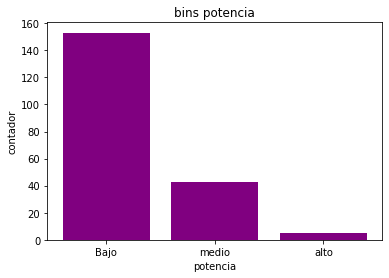

In [149]:
#Graficamos la distribucion
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, datos["binn_potencia"].value_counts(),color="purple")

plt.pyplot.xlabel("potencia")
plt.pyplot.ylabel("contador")
plt.pyplot.title("bins potencia")


<p>
    Verificamos cuidadosamente el marco de datos anterior, encontramos que la última columna proporciona los contenedores para "potencia" con 3 categorías ("Bajo", "Medio" y "Alto").
</p>
<p>
    Y asi reducimos 57 intervalos a solo 7
</p>

<h3> Visualización de contenedores </h3>
Normalmente, se usa un histograma para visualizar la distribución de los contenedores que creamos anteriormente.

Text(0.5, 1.0, 'bins potencia')

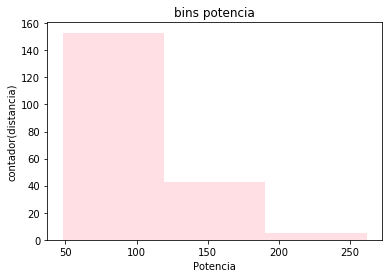

In [150]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

#dibujamos el histograma con 3 bins de atributo
plt.pyplot.hist(datos["potencia"], bins = 3,alpha=0.5,color="pink")

# Mostramos la informacion
plt.pyplot.ylabel("contador(distancia)")
plt.pyplot.xlabel("Potencia")
plt.pyplot.title("bins potencia")

<b> ¿Qué es una variable Dummy? </b>
<p>
    Una variable Dummy (o variable ficticia) es una variable numérica utilizada para etiquetar categorías. Se llaman 'dummies' porque los números en sí mismos no tienen un significado inherente.
</p>

<b> ¿Por qué usamos variables indicadoras? </b>
<p>
    Entonces podemos usar variables categóricas para el análisis de regresión.
</p>
<b> Ejemplo </b>
<p>
    Vemos que la columna "tipo de combustible" tiene dos valores únicos, "gas" o "diesel". La regresión no entiende palabras, solo números. Para usar este atributo en el análisis de regresión, convertimos "tipo de combustible" en variables indicadoras.
</p>

<p>
    Utilizaremos el método de panda 'get_dummies' para asignar valores numéricos a diferentes categorías de tipo de combustible.
</p>

In [162]:
datos.columns

Index(['simbolización', 'pérdidas normalizadas', 'marca',
       'tipo de combustible', 'aspiración', 'número de puertas',
       'estilo de carrocería', 'ruedas motrices', 'ubicación del motor',
       'distancia entre ejes', 'longitud', 'ancho', 'altura', 'peso en vacío',
       'tipo de motor', 'número de cilindros', 'tamaño del motor',
       'sistema de combustible', 'diámetro interior', 'carrera',
       'relación de compresión', 'potencia', 'pico-rpm', 'ciudad-mpg',
       'carretera-mpg', 'precio'],
      dtype='object')

obtenemos variables indicadoras y asignamos al marco de datos "dummy_variable_1"

In [163]:
dummy_variable_1 = pd.get_dummies(datos["tipo de combustible"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [153]:
#"Cambiamos los nombres de las  columnas par a que se enteinda mejor.
dummy_variable_1.rename(columns={'tipo de combustible':'gas', 'tipo de combustible':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [164]:
#Ahora tenemos el valor 0 para representar "gas" y 1 para representar "diesel" en la columna "tipo de combustible". Ahora volveremos a insertar esta columna en nuestro conjunto de datos original.
# fusionar el marco de datos "df" y "dummy_variable_1"
data = pd.concat([datos, dummy_variable_1], axis=1)

# cambiamos los datos 
datos.drop("tipo de combustible", axis = 1, inplace=True)

In [165]:
datos.head()

,simbolización,pérdidas normalizadas,marca,aspiración,número de puertas,estilo de carrocería,ruedas motrices,ubicación del motor,distancia entre ejes,longitud,...,tamaño del motor,sistema de combustible,diámetro interior,carrera,relación de compresión,potencia,pico-rpm,ciudad-mpg,carretera-mpg,precio
0,3,?,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


creamos una variable dummy en la columna de "aspiración": "estándar" a 0, mientras que "turbo" a 1.

In [172]:
# obtenemos variables indicadoras de aspiración y asignarlas al marco de datos "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(datos['aspiración'])

# cambiamos los nombres para que haya claridad
dummy_variable_2.rename(columns={'std':'aspiración  -std', 'turbo': 'aspiración  -turbo'}, inplace=True)

# mostramos las primeras 5 instancias del marco de datos "dummy_variable_1"
dummy_variable_2.head()


,aspiración -std,aspiración -turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Combinamos el nuevo marco de datos con el marco de datos original y luego solte la columna 'aspiración'

In [170]:
# fusionamos el nuevo marco de datos al marco de datos original
df = pd.concat([datos, dummy_variable_2], axis=1)

# soltamos la columna original "aspiración" de "df"
df.drop('aspiración', axis = 1, inplace=True)


In [171]:
df.to_csv('clean_df.csv')